## DATA PROCESSING 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# A helper function that converts 
# ["a", "b", "a", "c"] into
# [1, 2, 1, 3]
# This allows the machine learning algorithims to work on integers instead of strings
def categorize(l):
    uniques = sorted(list(set(l)))
    return [uniques.index(x) + 1 for x in l]

In [2]:
df_copy = pd.read_csv(r'C:\Users\bhavy\Desktop\INFO_DS\Project3_Data\lending-club-loan-data\loan.csv')
pd.set_option('display.max_columns',None)
df_copy.fillna(0,inplace=True)

# Drop unneccesary columns
df_copy = df_copy.drop(['url', 'desc', 'policy_code', 'last_pymnt_d', 'next_pymnt_d', 'earliest_cr_line', 'emp_title'], axis=1)
df_copy = df_copy.drop(['id', 'title', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'zip_code'], axis=1)

df_copy.head(3)

C:\Users\bhavy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,0.0,0.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,0.00,0.00,171.62,Jan-2016,0.0,0.0,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,GA,1.00,0.0,5.0,0.0,0.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,117.08,1.11,119.66,Sep-2013,0.0,0.0,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,IL,8.72,0.0,2.0,0.0,0.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,0.00,0.00,649.91,Jan-2016,0.0,0.0,INDIVIDUAL,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ANALYSIS

### 1. Loan Amount Base on Grade

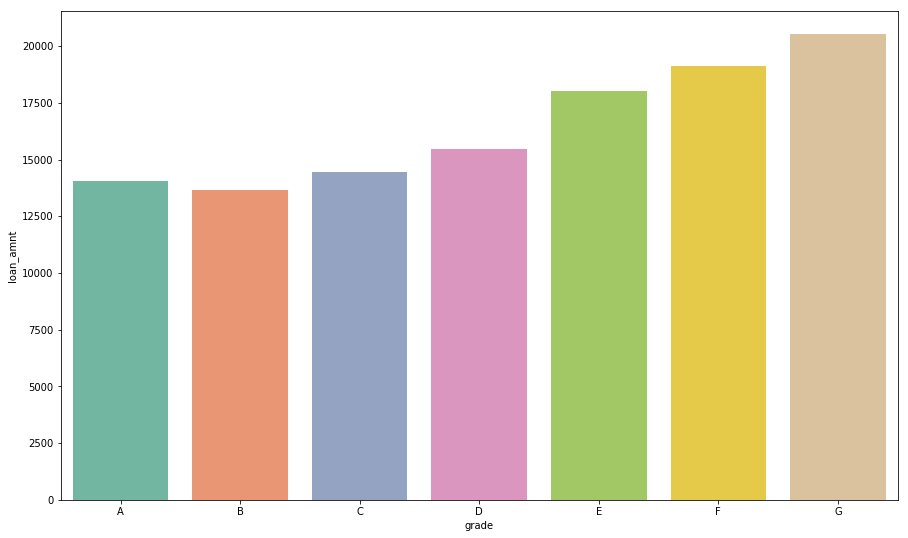

In [3]:
group = df_copy.groupby("grade").mean()
avg_loan = group['loan_amnt'].reset_index()
plt.subplots(figsize=(15,9))
sns.barplot(x='grade', y='loan_amnt', data=avg_loan, palette='Set2')

More number of loans have been issued for higher risk profile(with lower grades)

### 2. Interest Rate base on Grade

C:\Users\bhavy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


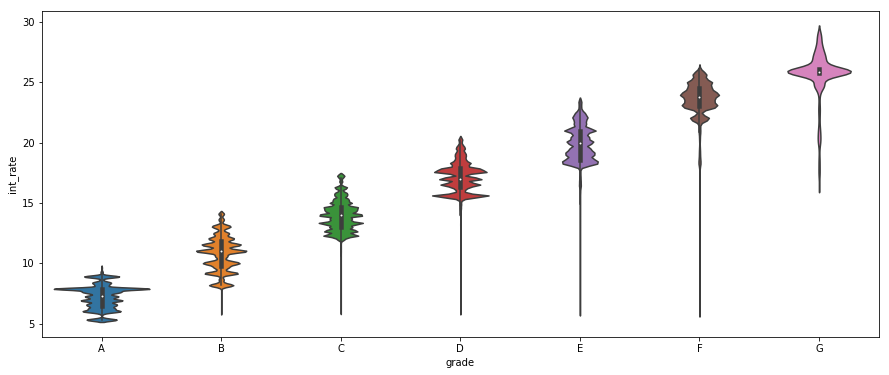

In [4]:
plt.subplots(figsize=(15,6))
sns.violinplot(x="grade", y="int_rate", data=df_copy, order="ABCDEFG")

As the grade value decreses the interest rate increases. The ideal interest rate for group A is around 7% and for group G is around 30%.

### 3. Loan status by grade

In [6]:
print("% of loans that are current or fully paid by each group of grade")
print(f"A: {round((103322+39679)/(2617+103322+47+39679+365+134+492) * 100, 2)}%")
print(f"B: {round((171735+66546)/(9519+171735+198+66546+1240+410+2004) * 100, 2)}%")
print(f"C: {round((171175+52678)/(12642+171175+360+52678+1887+678+3339) * 100, 2)}%")
print(f"D: {round((91984+30020)/(10486+91984+312+30020+1405+369+2890) * 100, 2)}%")
print(f"E: {round((47061+12928)/(6258+47061+201+12928+908+368+1852) * 100, 2)}%")
print(f"F: {round((13589+4726)/(2934+13589+79+4726+354+155+768)* 100, 2)}%")
print(f"G: {round((2913+1146)/(792+2913+22+1146+94+42+246)* 100, 2)}%")
pd.pivot_table(df_copy, index="loan_status", columns="grade", aggfunc="size")

% of loans that are current or fully paid by each group of grade
A: 97.51%
B: 94.69%
C: 92.21%
D: 88.75%
E: 86.22%
F: 81.02%
G: 77.24%


grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,2617,9519,12642,10486,6258,2934,792
Current,103322,171735,171175,91984,47061,13589,2913
Default,47,198,360,312,201,79,22
Does not meet the credit policy. Status:Charged Off,8,85,148,197,158,93,72
Does not meet the credit policy. Status:Fully Paid,90,269,481,494,378,154,122
Fully Paid,39679,66546,52678,30020,12928,4726,1146
In Grace Period,365,1240,1887,1405,908,354,94
Issued,1448,2529,2472,1185,593,194,39
Late (16-30 days),134,410,678,569,368,155,43


### 4. Average  Loan disbursed state wise

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [8]:
# create dataframe that holds values by state.

# create loan amount by state column
loan_amnt_by_state = df_copy.groupby(["addr_state"]).sum()["loan_amnt"]
df_region = loan_amnt_by_state.to_frame()
df_region["loan_amnt"] = df_region["loan_amnt"].map("{:,.0f}".format)
temp = []
for x in df_region["loan_amnt"]:
    a = int(x.replace(',', ''))
    temp.append(a)
df_region["loan_amnt"] = temp

# create number of loan issued by state column
num_issued_loan = df_copy.groupby(["addr_state"]).count()["member_id"]
df_region["num_issued"] = num_issued_loan

# create average loan amount column
avg_loan_amnt_by_state = []
for a,b in zip(df_region["loan_amnt"], df_region["num_issued"]):
    temp = int(a/b)
    avg_loan_amnt_by_state.append(temp)
df_region["avg_loan_amnt_by_state"] = avg_loan_amnt_by_state



In [9]:
# change index from state abbreviation to numeric value
df_region_copy = df_region.copy()
addr_state = df_region_copy.index
df_region.index = list(range(1,52))
df_region["addr_state"] = addr_state

In [10]:
# add more columns

# create num_default column 
d = df_copy[df_copy["loan_status"].isin(["Late (16-30 days)","Late (31-120 days)","Default", "Charged Off", "Does not meet the credit policy. Status:Charged Off"])].groupby("addr_state").size()
d = d.to_frame()
e = pd.DataFrame([0],index=["ME"])
f = pd.concat([d,e])
f_copy = f.copy()
addr_state = f_copy.index
f.index = list(range(1,52))
f["addr_state"] = addr_state
f = f.sort_values(by="addr_state")
f.index = list(range(1,52))
df_region["num_default"] = f[0]

# create default_rate column
temp = []
for x, y in zip(df_region["num_default"], df_region["num_issued"].astype(int)):
    if x is not 0 and y is not 0:
        value = (x/y)
        value = "{0:.2f}".format(value)
        value = float(value)
        temp.append(value)
    else:
        temp.append(0)
df_region["default_rate"] = temp

# create average dti by the state
dti = df_copy.groupby("addr_state").agg([np.mean])["dti"]
dti.columns = ["dti"]
dti.index = list(range(1,52))
df_region = df_region.join(dti)

In [11]:
# plotly color setting
for col in df_region.columns:
    df_region[col] = df_region[col].astype(str)
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


# create text column
df_region["text"] = df_region["addr_state"] + '<br>' + \
"Total loan amount ($ USD): " + df_region["loan_amnt"] + "<br>" + \
"Avg loan amount ($ USD): " + df_region["avg_loan_amnt_by_state"] + '<br>' + \
"Default rate: " + df_region["default_rate"] + "<br>" + \
"DTI: " + df_region["dti"]

In [12]:
# setting plotly and deploy the map
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_region['addr_state'],
        z = df_region['avg_loan_amnt_by_state'], 
        locationmode = 'USA-states',
        text = df_region['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]

layout = dict(
        title = 'Average Loan By State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

### 5. Heap Map and statistical analysis

In [13]:
# create new dataset for exploratory analysis
df_exp = pd.DataFrame()
df_exp['annual_inc'] = df_copy['annual_inc']
df_exp['delinq_2yrs'] = df_copy['delinq_2yrs']
df_exp['dti'] = df_copy['dti']
#df_exp['emp_length'] = categorize(df_copy['emp_length'])
df_exp['grade'] = categorize(df_copy['grade'])
df_exp['home_ownership'] = categorize(df_copy['home_ownership'])
df_exp['installment'] = df_copy['installment']
df_exp['int_rate'] = df_copy['int_rate']
df_exp['loan_amnt'] = df_copy['loan_amnt']
df_exp['loan_status'] = categorize(df_copy['loan_status'])
df_exp['purpose'] = categorize(df_copy['purpose'])
df_exp['sub_grade'] = categorize(df_copy['sub_grade'])
df_exp['term'] = categorize(df_copy['term'])
df_exp['acc_now_delinq'] = df_copy['acc_now_delinq']

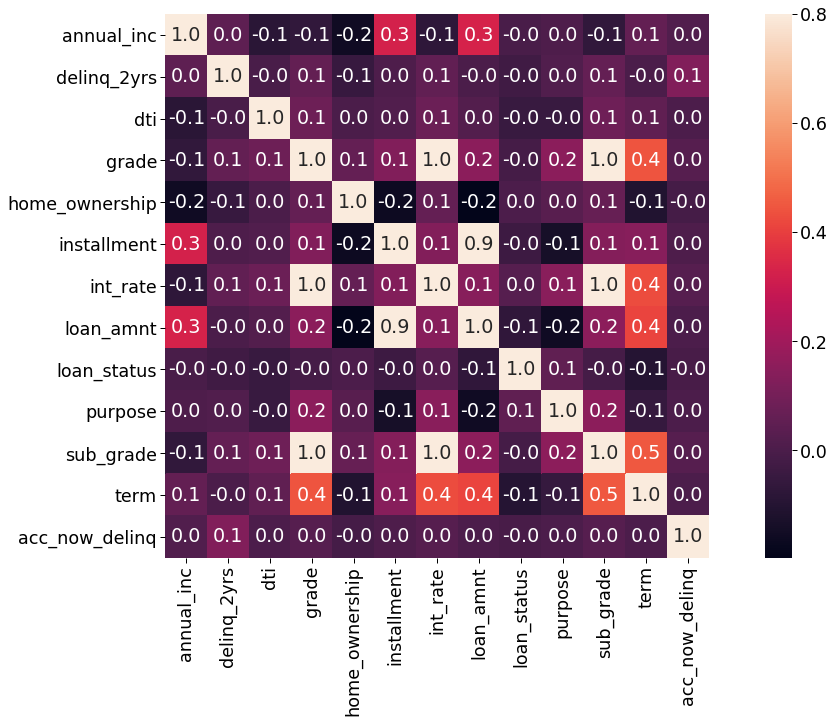

In [14]:
plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale=2)
sns.heatmap(df_exp.corr(), vmax=.8, square=True, annot=True, fmt='.1f')

We can see that sub_grade and term seem they have high correlation.
and loan_status is not correlated with most of the factors

In [15]:
# import necessary libraries for statistical testing
from scipy import stats
from pandas.tools import plotting

In [16]:
high_grade = df_exp[df_exp["grade"] < 4]["loan_status"]
low_grade = df_exp[df_exp["grade"] >= 4]["loan_status"]
two_samples = stats.ttest_ind(high_grade, low_grade)
print("The t-statistic is %.3f and the p-value is %.3f" % two_samples)

The t-statistic is 6.452 and the p-value is 0.000


In [17]:
shorter_term = df_exp[df_exp.term == 1]["loan_status"]
longer_term = df_exp[df_exp.term == 2]["loan_status"]
two_samples = stats.ttest_ind(shorter_term, longer_term)
print("The t-statistic is %.3f and the p-value is %.3f" % two_samples)

The t-statistic is 93.514 and the p-value is 0.000


In [18]:
low_int_rate = df_exp[df_exp["int_rate"] < 16.00]["loan_status"]
high_int_rate = df_exp[df_exp["int_rate"] >= 16.00]["loan_status"]
two_samples = stats.ttest_ind(low_int_rate, high_int_rate)
print("The t-statistic is %.3f and the p-value is %.3f" % two_samples)

The t-statistic is -9.607 and the p-value is 0.000


With the low p values we can infer that there is a correlation between grade and loan_status , term and loan_status , int_rate and loan_status

### 6. LOAN STATUS

In [19]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df_copy))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

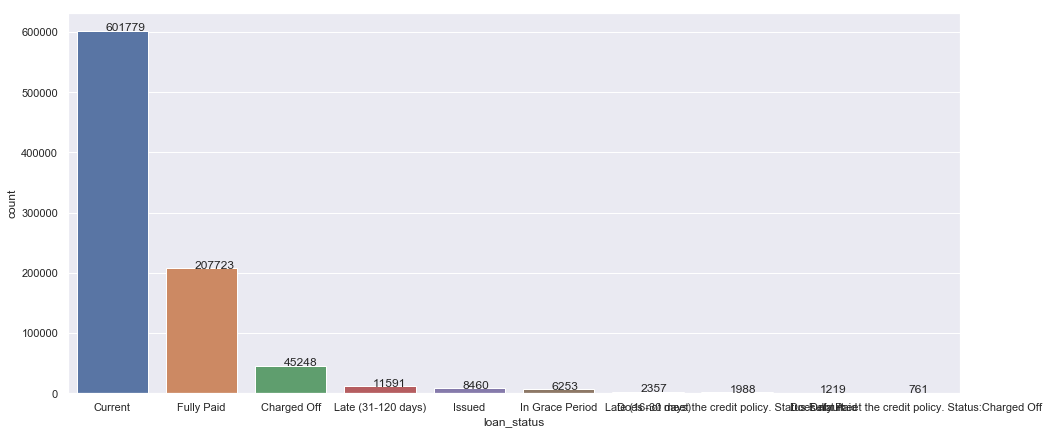

In [20]:
univariate(df_copy,col='loan_status',vartype=1)

### 7. HOME OWNERSHIP WISE LOAN

In [21]:
loan_home = ['loan_status', 'home_ownership']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_copy[loan_home[0]], df_copy[loan_home[1]]).style.background_gradient(cmap = cm)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,0,19878,7,27,4025,21311
Current,2,303764,2,3,62041,235967
Default,0,498,0,0,110,611
Does not meet the credit policy. Status:Charged Off,0,348,1,11,49,352
Does not meet the credit policy. Status:Fully Paid,0,908,4,27,138,911
Fully Paid,1,104966,36,114,17960,84646
In Grace Period,0,2855,0,0,637,2761
Issued,0,4220,0,0,1038,3202
Late (16-30 days),0,1101,0,0,260,996


In [22]:
df_copy.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [23]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
df_copy.drop(df_copy[df_copy['home_ownership'].isin(rem)].index,inplace=True)
df_copy.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

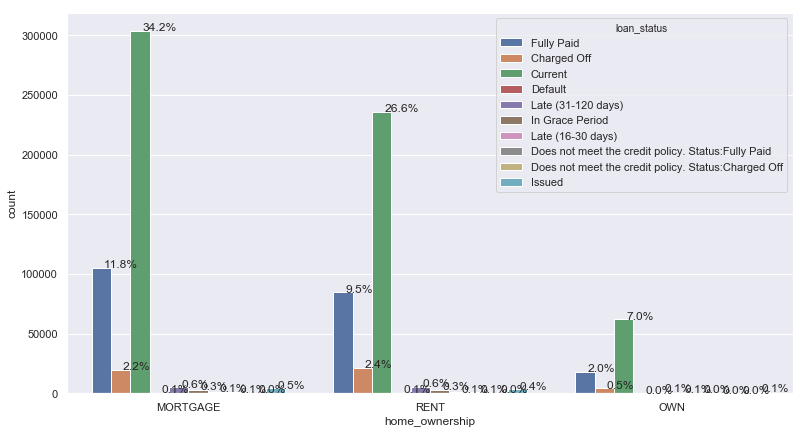

In [24]:
univariate(df=df_copy,col='home_ownership',vartype=1,hue='loan_status')

More than 50% of the   cutomers have mortgaged their homes.

### 8. YEAR WISE LOAN

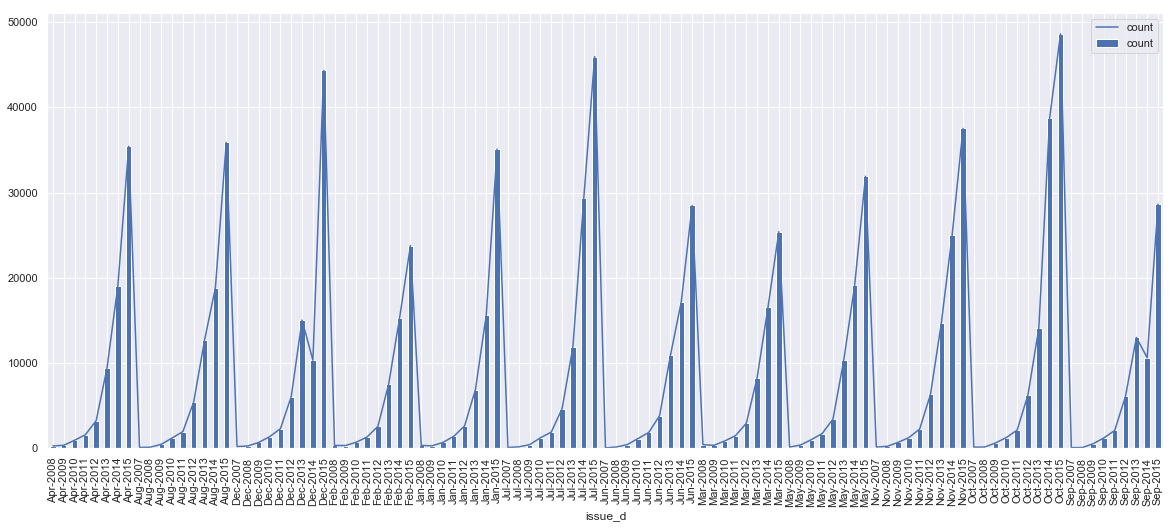

In [25]:
year_wise =df_copy.groupby(by= [df_copy.issue_d])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

### 9. Loan Term

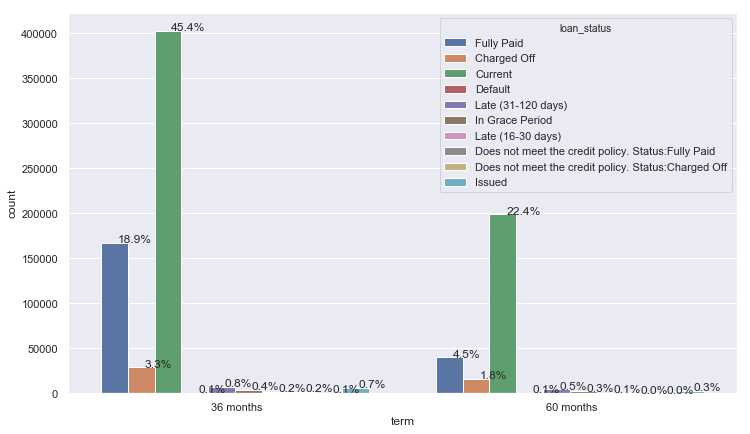

In [26]:
univariate(df=df_copy,col='term',vartype=1,hue='loan_status')

Most of the loans given by the Lending Club are for the 36 months term

### 10. Purpose of Loan vs Loan Amount for each Loan Status

In [27]:
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_copy[purp_loan[0]], df_copy[purp_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,,,,
car,447,4937,10,13,50,3197,40,81,15,70
credit_card,7816,149832,233,67,268,42197,1150,2071,381,2096
debt_consolidation,27585,356236,790,287,801,120715,3998,4796,1510,7419
educational,56,1,0,31,64,266,0,0,0,0
home_improvement,2267,34980,47,71,141,12649,367,493,137,662
house,286,1854,7,10,32,1365,37,37,15,61
major_purchase,874,10308,14,23,99,5384,125,184,51,207
medical,569,5324,15,22,34,2282,56,91,17,125
moving,424,3121,11,15,29,1603,43,52,23,90


C:\Users\bhavy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



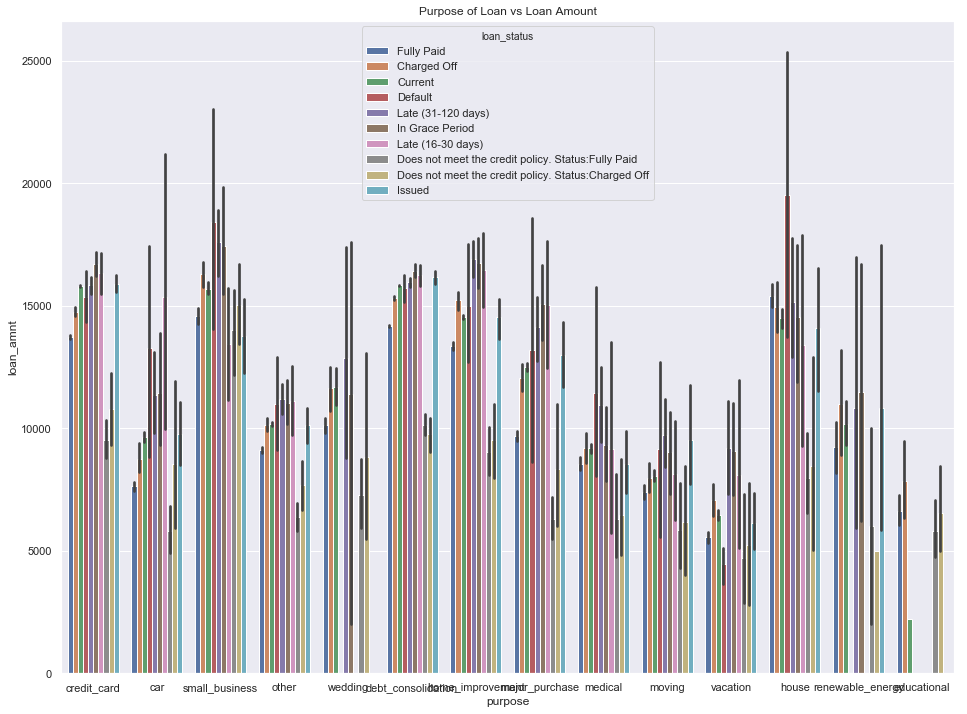

In [28]:
plt.figure(figsize=(16,12))
sns.barplot(data =df_copy, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

### 11. Employment Length vs Loan Amount for different pupose of Loan

In [29]:
loanstatus=df_copy.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=df_copy.loc[df_copy['loan_status']=='Charged Off']

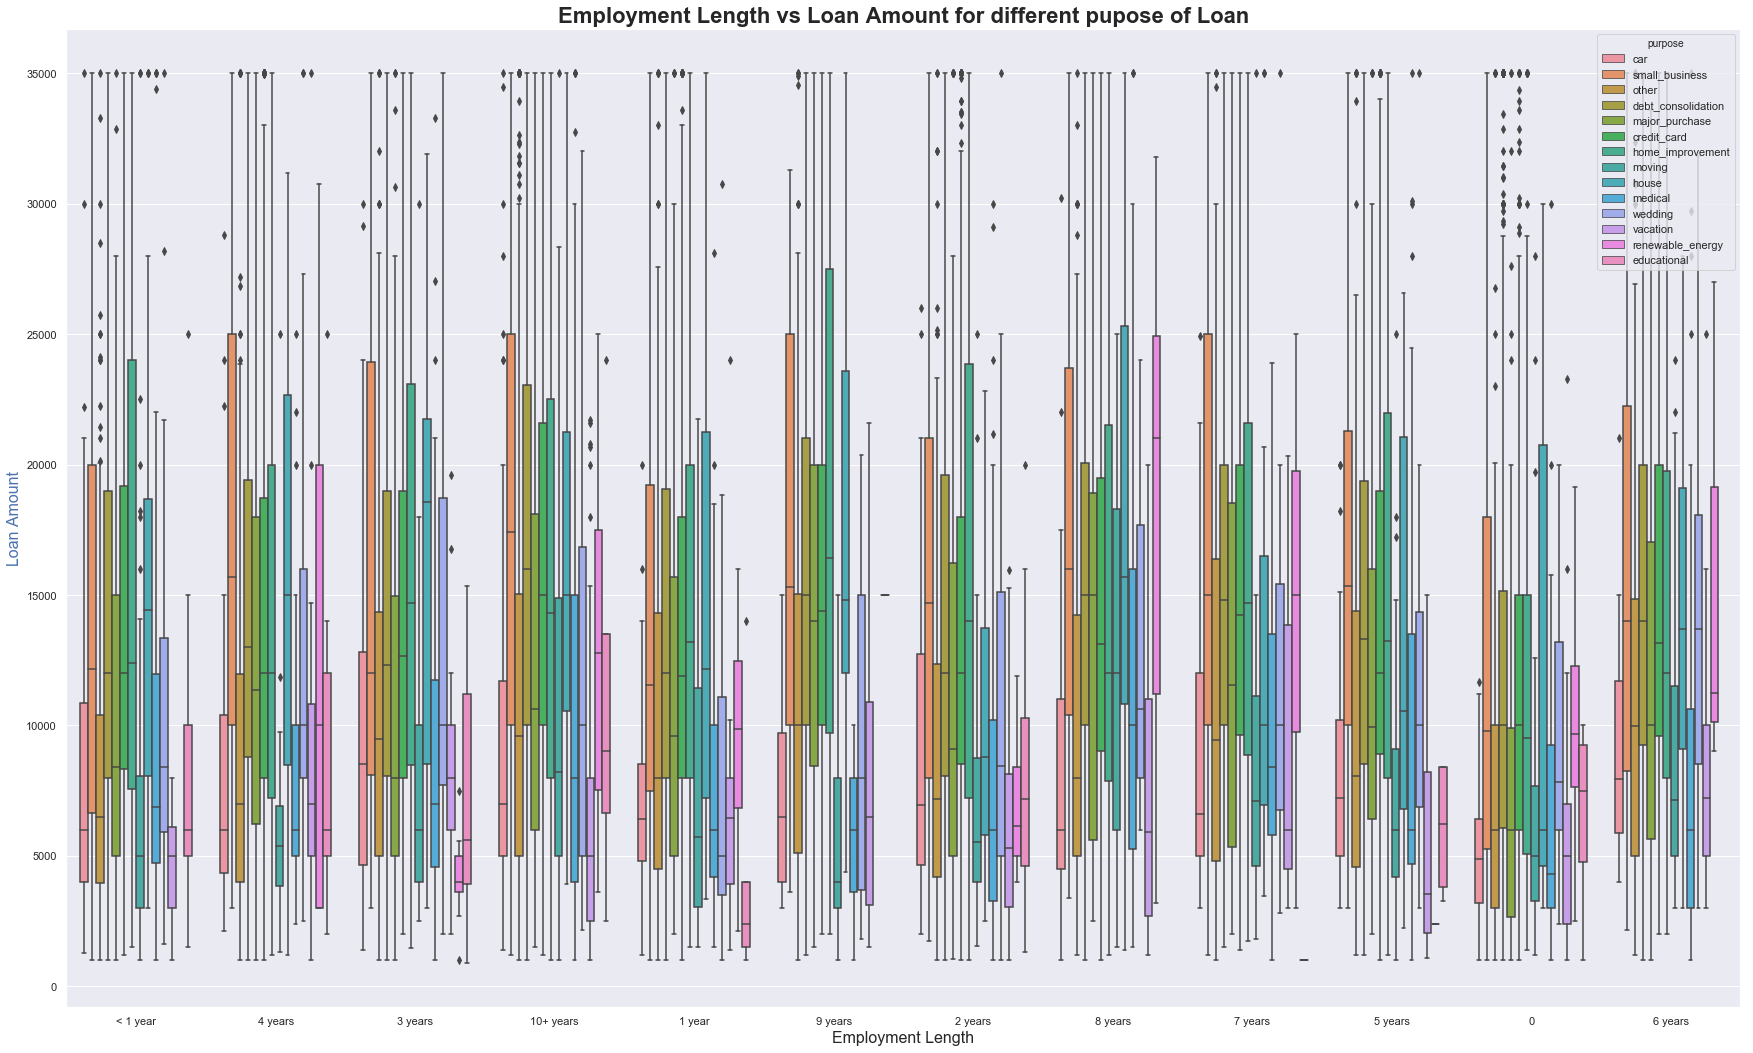

In [30]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

Current                                                601772
Fully Paid                                             207572
Charged Off                                             45214
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1957
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       749
Name: loan_status, dtype: int64


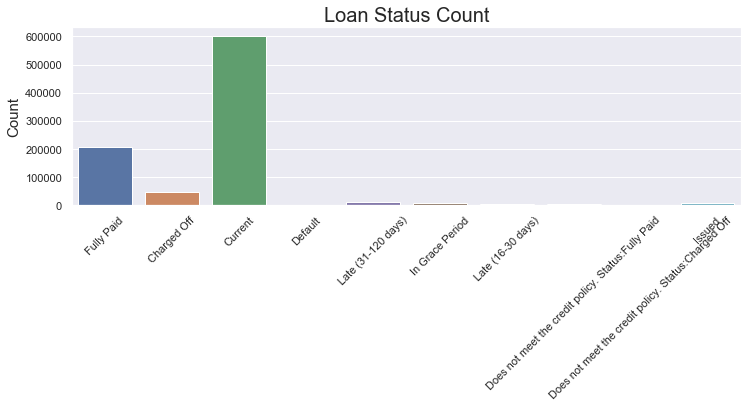

In [31]:
print(df_copy.loan_status.value_counts())

plt.figure(figsize = (12,14))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df_copy)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Count", fontsize=20)


plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 0.9)

plt.show()

### 12. Analyzing the status of loans issued over the years

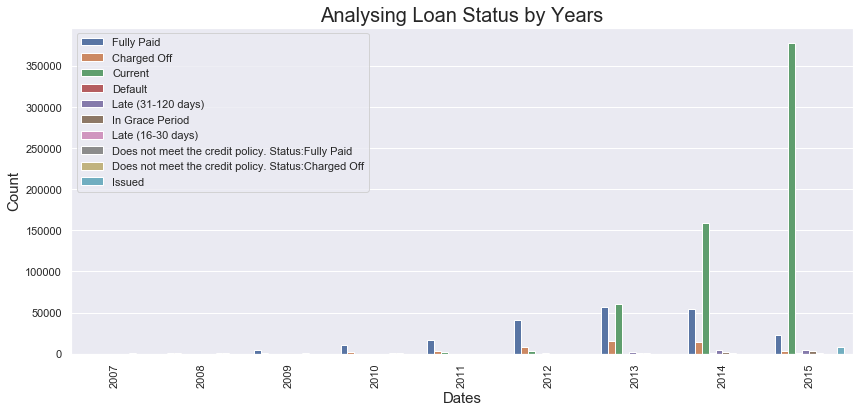

In [32]:
df_copy['issue_month'], df_copy['issue_year'] = df_copy['issue_d'].str.split('-', 1).str

months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df_copy['issue_month'] = pd.Categorical(df_copy['issue_month'],categories=months_order, ordered=True)

plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='issue_year', data=df_copy,
                  hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()

### 13. Loan stuts vs different verifictaion status

In [33]:
loan_verification = ['loan_status', 'verification_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_copy[loan_verification[0]], df_copy[loan_verification[1]]).style.background_gradient(cmap = cm)

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,12192,13737,19285
Current,171400,243704,186668
Default,278,462,479
Does not meet the credit policy. Status:Charged Off,503,79,167
Does not meet the credit policy. Status:Fully Paid,1302,207,448
Fully Paid,73782,60256,73534
In Grace Period,1403,2523,2327
Issued,2779,2836,2845
Late (16-30 days),473,1006,878


Nearly 30% of the loans issued have their sources not verified

### 14. Interest Rate and Loan amount sanctioned for different Application Types

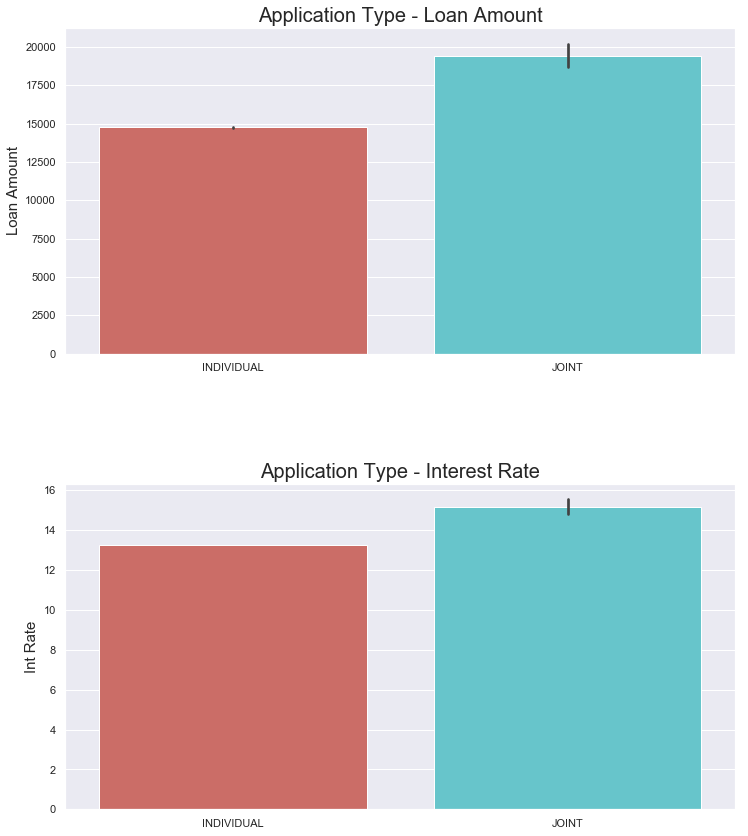

In [34]:
plt.figure(figsize = (12,14))
#The amount and int rate x application_type 
plt.subplot(211)
g = sns.barplot(x="application_type", y="loan_amnt",data=df_copy, 
            palette="hls")
g.set_title("Application Type - Loan Amount", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.subplot(212)
g1 = sns.barplot(x="application_type", y="int_rate",data=df_copy,
               palette="hls")
g1.set_title("Application Type - Interest Rate", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Int Rate", fontsize=15)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()



We can see that Loans of higher numbers are issued to customers of Joint account and their interest rates are also comparatively higher than the accounts of type Individual